In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Load Data 
Ce jeu de données a été partagé sur Kaggle par un utilisateur nommé Mathchi. Il n'existe aucune indication officielle quant à la provenance des données ou à la banque concernée. Les informations qu'il contient (par exemple, les pays comme la France, l'Espagne et l'Allemagne) sont générées de manière à refléter des scénarios réalistes, mais elles ne correspondent pas à des clients réels.

In [55]:
data = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

Display the first rows of the dataframes

In [56]:
data.head()

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0


In [57]:
test.head()

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,67897,15585246,Bancks,585,France,Female,53.0,2,0.00,2,1.0,1.0,91830.75
1,163075,15604551,Robb,606,France,Male,24.0,2,0.00,1,0.0,1.0,90876.95
2,134760,15729040,Ugochukwu,633,Germany,Male,44.0,1,118907.60,1,1.0,0.0,47777.15
3,68707,15792329,Hs?,602,Germany,Male,40.0,2,149961.99,2,1.0,1.0,82696.84
4,3428,15617166,Genovesi,645,France,Male,31.0,4,132351.29,1,1.0,0.0,151887.16


In [58]:
# get the shape of the dataframes

data.shape, test.shape

((143579, 14), (21455, 13))

 ### Analyse du dataset

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143579 entries, 0 to 143578
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               143579 non-null  int64  
 1   CustomerId       143579 non-null  int64  
 2   Surname          143579 non-null  object 
 3   CreditScore      143579 non-null  int64  
 4   Geography        143579 non-null  object 
 5   Gender           143579 non-null  object 
 6   Age              143579 non-null  float64
 7   Tenure           143579 non-null  int64  
 8   Balance          143579 non-null  float64
 9   NumOfProducts    143579 non-null  int64  
 10  HasCrCard        143579 non-null  float64
 11  IsActiveMember   143579 non-null  float64
 12  EstimatedSalary  143579 non-null  float64
 13  Exited           143579 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 15.3+ MB


In [60]:
data.isna().sum()

ID                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Delete ID, CustmerID,  Surname and target Exited

In [61]:
df = data.iloc[:, 3:14]

In [62]:
# variables continues
Continu_col = ["CreditScore", "EstimatedSalary", "Balance", "Age"]
# variables discretes
discret_col = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

In [63]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000
mean,656.411704,38.144476,5.018408,55533.640642,1.553932,0.754107,0.496800,112530.072465,0.212078
std,80.210361,8.871711,2.807027,62822.616346,0.546754,0.430617,0.499991,50301.718378,0.408781
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74580.800000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117931.100000,0.000000
75%,710.000000,42.000000,7.000000,119948.090000,2.000000,1.000000,1.000000,155149.685000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


### Analyse numeric features

In [64]:
for num_feature in Continu_col:
    print(df.groupby("Exited")[num_feature].mean(), "\n")

Exited
0    657.532136
1    652.249031
Name: CreditScore, dtype: float64 

Exited
0    112024.082699
1    114409.944918
Name: EstimatedSalary, dtype: float64 

Exited
0    51274.230558
1    71358.363247
Name: Balance, dtype: float64 

Exited
0    36.583765
1    43.942890
Name: Age, dtype: float64 



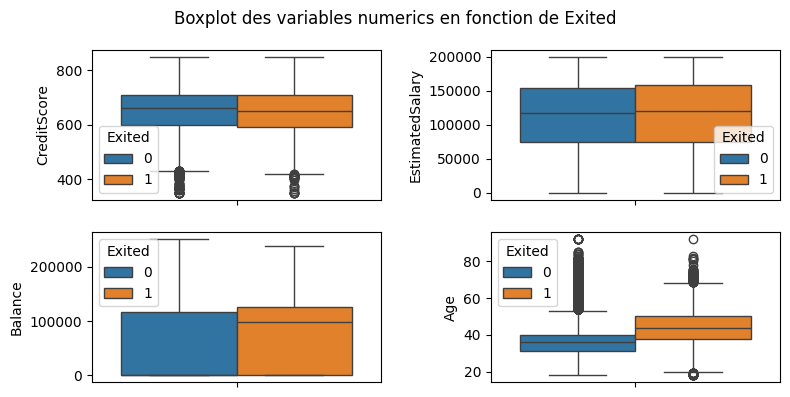

In [65]:
# Analyse graphique de la cible Exited avec les variables continues

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,4))
axes = axes.flatten()
for i in range(len(Continu_col)):
   sns.boxplot(data=df, y=Continu_col[i], hue='Exited', ax=axes[i])
 
plt.suptitle("Boxplot des variables numerics en fonction de Exited") 
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

Une différence importante se remarque au niveau des boxplot de la variable $Age$, les personnes âgés  résilient le plus

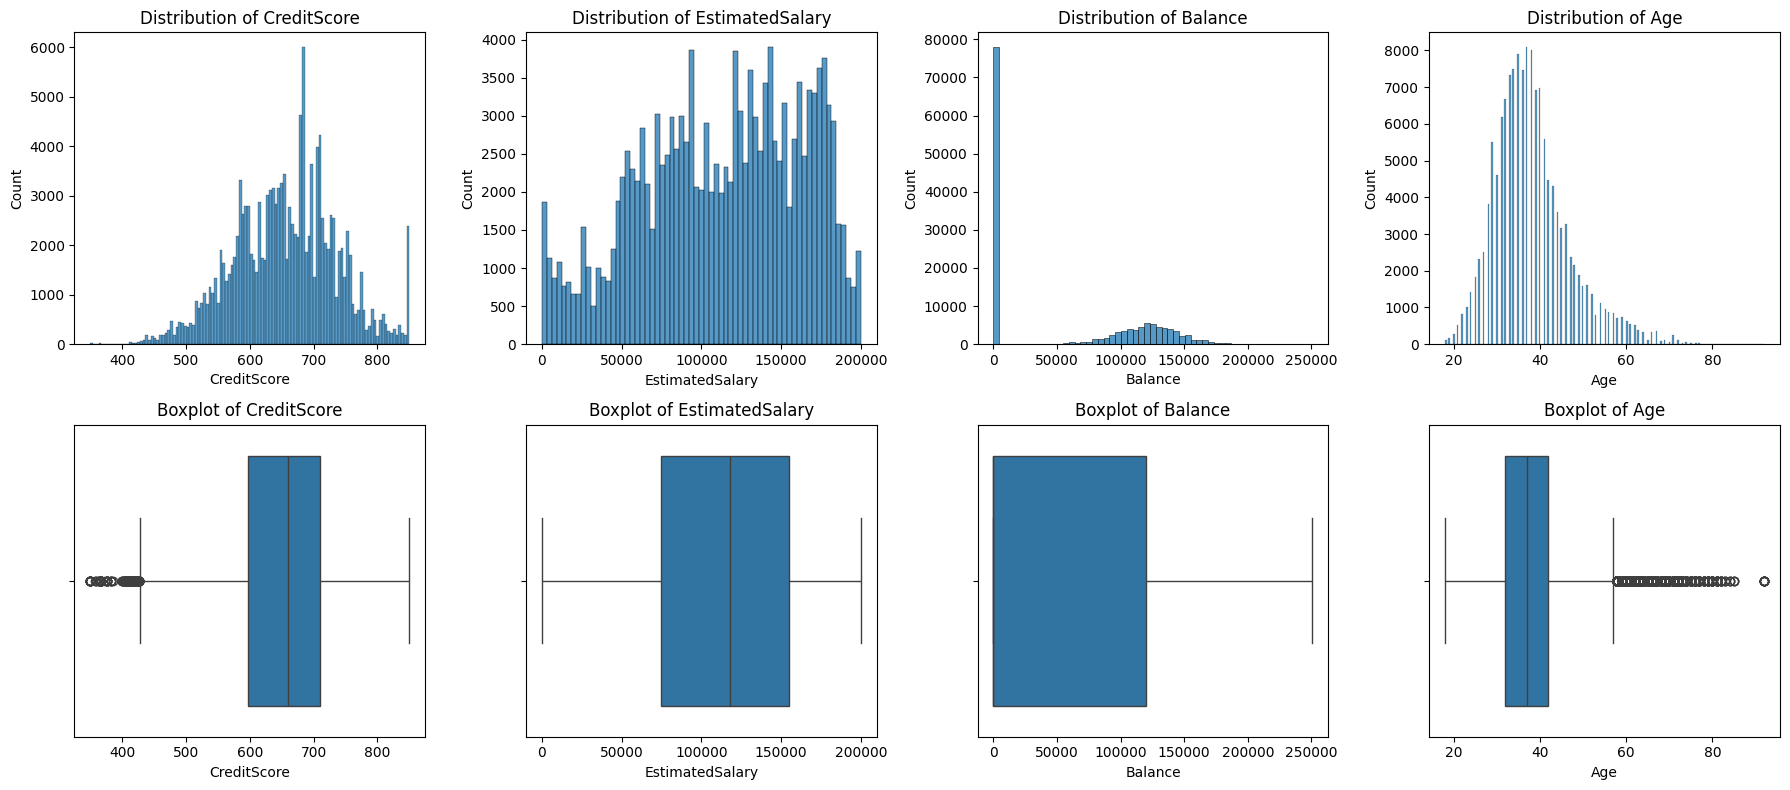

In [66]:
fig, ax = plt.subplots(2,4, figsize = (18,8))
for i in range(len(Continu_col)):
    sns.histplot(data=df, x=Continu_col[i], ax=ax[0][i])
    sns.boxplot(data=df, x=Continu_col[i], ax=ax[1][i])

    ax[0][i].set_title(f'Distribution of {Continu_col[i]}')
    ax[1][i].set_title(f'Boxplot of {Continu_col[i]}')    
plt.tight_layout()    
plt.show()    

- Une tendance normale au niveau du $CreditScore$ et $Age$ avec des outliers
- Deux groupes se dégagent au niveau de $Balance$ 
    - un pour les comptes vide 
    - l'autre pour les comptes non vide

In [67]:
# creation d'une variable Balance_void
Balance_Void = (df["Balance"]==0).astype(int) #  df["Balance"].apply(lambda x : 1 if x == 0 else 0) 
df["Balance_void"] = Balance_Void

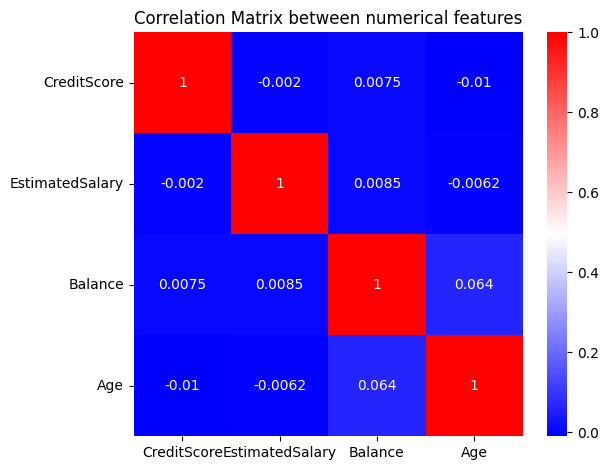

In [68]:
sns.heatmap(df[Continu_col].corr(), annot=True, cmap='bwr')
plt.title("Correlation Matrix between numerical features")
plt.tight_layout()
plt.show()

Analyse categorical features

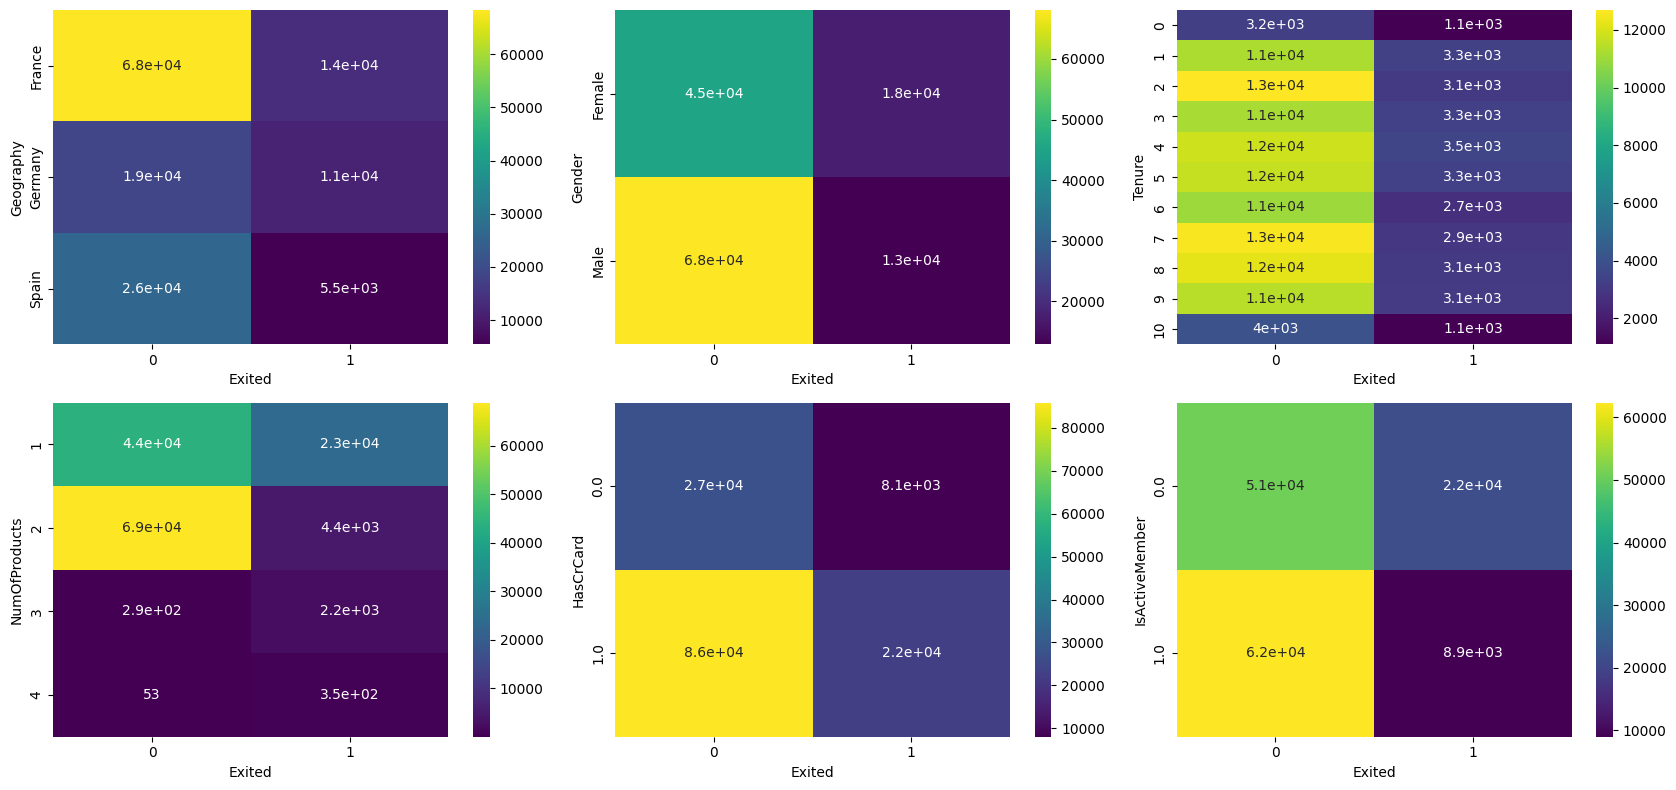

In [69]:
# Analyse avec les variables discretes

fig , axes = plt.subplots(2, 3, figsize=(17, 8), sharex=False)
axes = axes.flatten()
for i in range(len(discret_col)-1):
    sns.heatmap(pd.crosstab(df["Exited"], df[discret_col[i]]).T, ax=axes[i], annot=True, cmap='viridis')

plt.tight_layout()
plt.show()

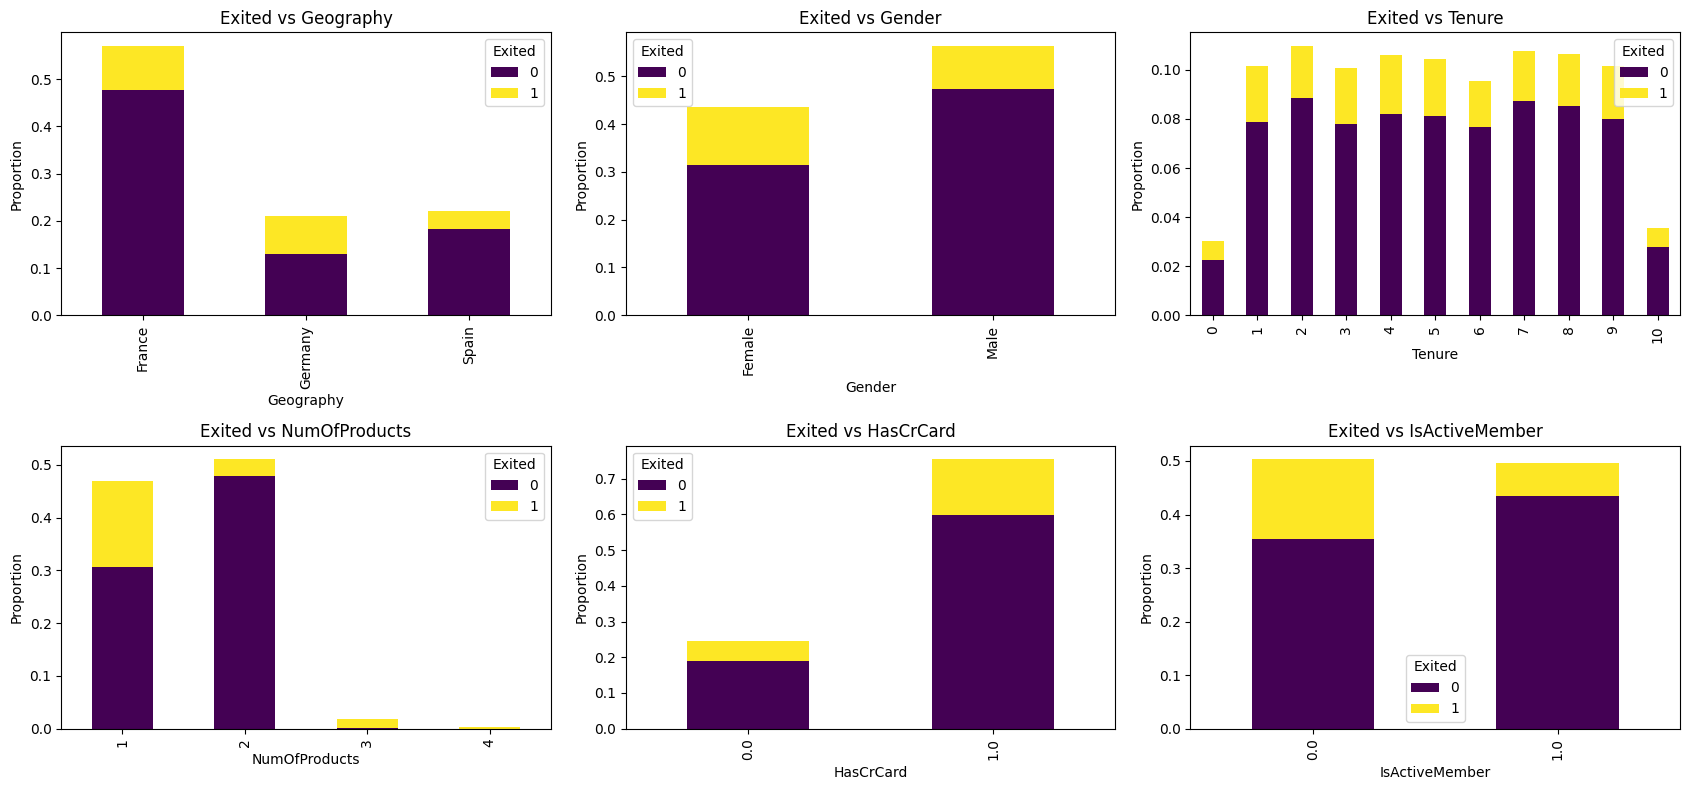

In [70]:
fig , axes = plt.subplots(2, 3, figsize=(17, 8), sharex=False)
axes = axes.flatten()
for i in range(len(discret_col)-1):
   pd.crosstab(df["Exited"], df[discret_col[i]], normalize=True).T.plot(kind='bar', stacked=True, ax=axes[i], colormap='viridis')
   axes[i].set_ylabel("Proportion")
   axes[i].set_title(f"Exited vs {discret_col[i]}")
plt.tight_layout()
plt.show()

### Outliers

In [71]:
def IRQ_outliers_detection(df, feature, threshold=1.5):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1 - threshold * IQR
    upper_bound = q3 + threshold * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

outliers_creditScore = IRQ_outliers_detection(df,'CreditScore')
outliers_age = IRQ_outliers_detection(df, "Age")

In [72]:
print(f"{outliers_age.shape = }")
print(f"{outliers_creditScore.shape = }")

outliers_age.shape = (5607, 12)
outliers_creditScore.shape = (230, 12)


In [73]:
from sklearn.pipeline import  Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn import set_config
set_config(transform_output='pandas')

In [74]:
# Un OneHotEncoding sera fait au niveau des  variables Gender et Geography
# Un MinMaxScaler au niveau de la variable Balance , EstimatedSalary
# Un StandarScaler au niveau des variables Age,  CreditScore

Categorical_col = ["Gender", "Geography"] 
MinMax_col = ["Balance", "EstimatedSalary"]
Standar_col =["Age", "CreditScore"]
Polynomial_col = ["Balance",  "EstimatedSalary", "Balance", "EstimatedSalary"]

Onehot = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
Polynomial_Features = PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)

coloumn_transform = ColumnTransformer ( 
    remainder = 'passthrough',
    verbose_feature_names_out=True,
    transformers=[
         ("Encoding", Onehot , Categorical_col),
         #("Polynomial", Polynomial_Features, Polynomial_col),
         ("MinMax", MinMaxScaler(), MinMax_col),
         ("Standar", StandardScaler(), Standar_col)
         
         ]
   )

In [75]:

pipeline = make_pipeline(coloumn_transform, SelectKBest(score_func=f_classif, k=6))
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Encoding',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Geography']),
                                                 ('MinMax', MinMaxScaler(),
                                                  ['Balance',
                                                   'EstimatedSalary']),
                                                 ('Standar', StandardScaler(),
                                                  ['Age', 'CreditScore'])])),
                ('selectkbest', SelectKBest(k=6))])

In [76]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

#### Modele `LogisticRegression`

In [77]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

X_train = pipeline.fit_transform(X_train, Y_train)
X_test = pipeline.transform(X_test)

Entrainement

In [78]:
Logistic_model = LogisticRegression()
Logistic_model.fit(X_train, Y_train)

LogisticRegression()

Prediction

In [79]:
y_pred = Logistic_model.predict(X_test)

y_pred_train = Logistic_model.predict(X_train)

Evaluation

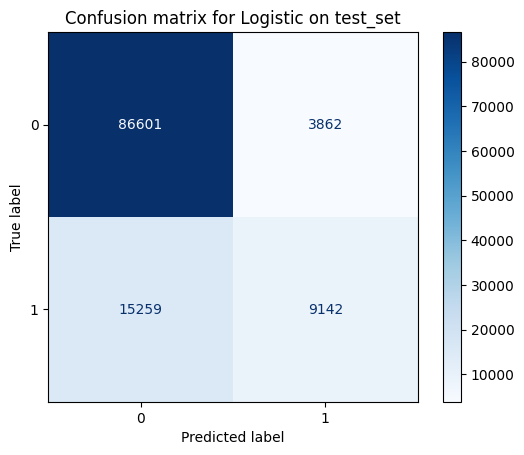

In [80]:
# matrice de confusion
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = Logistic_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion matrix for Logistic on test_set")
plt.show()

In [81]:
# f1_score

print(f"f1_score on test_set: {f1_score(y_test, y_pred)}")
print(f"f1_score on train_set: {f1_score(Y_train, y_pred_train)}")

f1_score on test_set: 0.4888116561956958
f1_score on train_set: 0.48761576566874865


#### Optimisation de plusieurs hyper-parametre avec GridSearch

In [82]:
from sklearn.model_selection import  GridSearchCV

In [83]:
# grille des parametres
param_grid ={"penalty" : ['elasticnet'],
             "C" : [0.01, 0.1, 100],
             "solver" : [ "saga"],
             "class_weight" : [None,"balanced"],
             "max_iter" : [100],
             "l1_ratio": [ 0.8,  1]
         }

grid_search = GridSearchCV(estimator = Logistic_model,
                           param_grid = param_grid,
                           cv = 5,
                           scoring = "f1")

# entrainement
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 100],
                         'class_weight': [None, 'balanced'],
                         'l1_ratio': [0.8, 1], 'max_iter': [100],
                         'penalty': ['elasticnet'], 'solver': ['saga']},
             scoring='f1')

In [84]:
params = grid_search.cv_results_["params"]
score = grid_search.cv_results_["mean_test_score"]
grid_search_result = pd.DataFrame(params)
grid_search_result["score"] =score
grid_search_result.head()

,C,class_weight,l1_ratio,max_iter,penalty,solver,score
0,0.01,None,0.8,100,elasticnet,saga,0.448286
1,0.01,None,1.0,100,elasticnet,saga,0.447224
2,0.01,balanced,0.8,100,elasticnet,saga,0.555828
3,0.01,balanced,1.0,100,elasticnet,saga,0.555581
4,0.10,None,0.8,100,elasticnet,saga,0.481930


In [85]:
print(f"Meilleurs paramètre : {grid_search.best_params_}")
print(f"Meilleure score :  {grid_search.best_score_}")

Meilleurs paramètre : {'C': 0.01, 'class_weight': 'balanced', 'l1_ratio': 0.8, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
Meilleure score :  0.5558284046632295


In [86]:
best_model = grid_search.best_estimator_
y_pred_logistic = best_model.predict(X_test)
y_pred_train_logistic = best_model.predict(X_train)

print(f"f1_score train_set= {f1_score(Y_train, y_pred_train_logistic)}")
print(f"f1_score test_set= {f1_score(y_test, y_pred_logistic)}")

f1_score train_set= 0.5558893478532982
f1_score test_set= 0.5623823270992846


### Model `RandomForestClassifier`

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
model_random = RandomForestClassifier()
model_random.fit(X_train, Y_train)

y_pred = model_random.predict(X_test)
y_pred_train = model_random.predict(X_train)

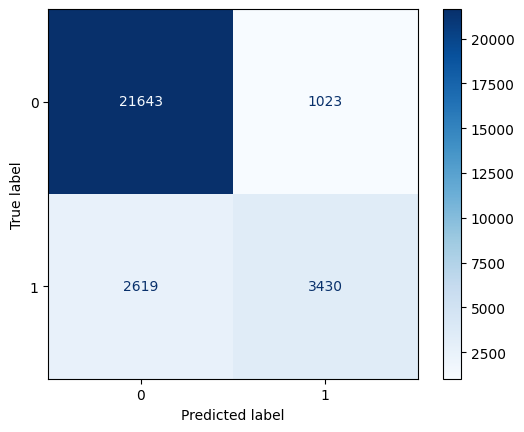

In [89]:
cm = confusion_matrix(Y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model_random.classes_)
disp.plot(cmap=plt.cm.Blues)


In [90]:
print(f"f1_score train_set : {f1_score(Y_train, y_pred_train)}")
print(f"f1_score test_set : {f1_score(y_test, y_pred)}")

f1_score train_set : 0.6532089125880784
f1_score test_set : 0.613200343609812


In [91]:
param_grid = {'n_estimators':[100],
              'max_depth':[10,15],
              'min_samples_split':[2,5],
              'min_samples_leaf':[2,4]
}

grid = GridSearchCV(estimator = model_random,
                    param_grid = param_grid,
                    cv = 5,
                    scoring = 'f1')

grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5], 'n_estimators': [100]},
             scoring='f1')

In [92]:
print(f"Meilleurs paramètre : {grid.best_params_}")
print(f"Meilleure score :  {grid.best_score_}")

Meilleurs paramètre : {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Meilleure score :  0.623568072576712


In [93]:
model_best_random = grid.best_estimator_
y_pred_random = model_best_random.predict(X_test)
y_pred_random_train = model_best_random.predict(X_train)

print(f"f1_score train_set= {f1_score(Y_train, y_pred_random_train)}")
print(f"f1_score test_set= {f1_score(y_test, y_pred_random)}")

f1_score train_set= 0.6425365294623245
f1_score test_set= 0.6207956209636761


### Model `XGBoost`

In [94]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [95]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [96]:
y_pred_xgb = model_xgb.predict(X_test)
y_pred_train_xgb = model_xgb.predict(X_train)

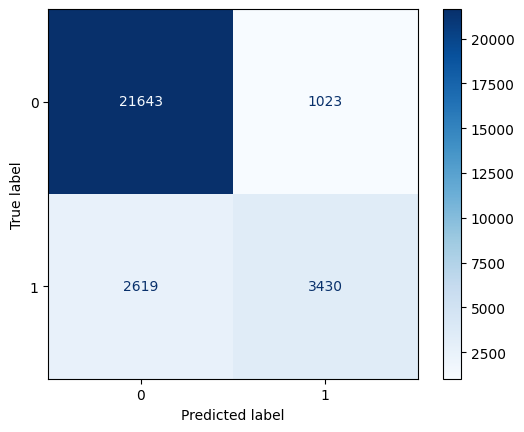

In [97]:
cm_xgb = confusion_matrix(Y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels = model_xgb.classes_)
disp.plot(cmap=plt.cm.Blues)


In [98]:
print(f"f1_score train_set : {f1_score(Y_train, y_pred_train_xgb)}")
print(f"f1_score test_set : {f1_score(y_test, y_pred_xgb)}")

f1_score train_set : 0.651431769424494
f1_score test_set : 0.6317318278713486


Optimisation avec gridsearchCV

In [99]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [ 5, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 0.9]
}

grid_search_xgb = GridSearchCV(
    estimator=model_xgb,
    param_grid=param_grid,
    scoring='f1',   
    cv=5
)

grid_search_xgb.fit(X_train, Y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.01, 0.1], 'max_depth': [5, 6],
                         'n_estimators': [100], 'subsample': [0.8, 1.0]},
             scoring='f1')

In [100]:
model_best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = model_best_xgb.predict(X_test)
y_pred_xgb_train = model_best_xgb.predict(X_train)

print(f"f1_score train_set= {f1_score(Y_train, y_pred_xgb_train)}")
print(f"f1_score test_set= {f1_score(y_test, y_pred_xgb)}")

f1_score train_set= 0.6478820675499161
f1_score test_set= 0.6332026389312798


### Prediction sur test_data.csv

In [101]:
test.head(3)

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,67897,15585246,Bancks,585,France,Female,53.0,2,0.0,2,1.0,1.0,91830.75
1,163075,15604551,Robb,606,France,Male,24.0,2,0.0,1,0.0,1.0,90876.95
2,134760,15729040,Ugochukwu,633,Germany,Male,44.0,1,118907.6,1,1.0,0.0,47777.15


In [102]:
test1 = test.drop(["ID","CustomerId", "Surname"], axis=1)
Balance_void = (test1["Balance"]==0).astype(int)
test1["Balance_void"] = Balance_Void

In [103]:
test_set = pipeline.transform(test1)
predictions = model_best_xgb.predict(test_set)

In [104]:
results = pd.DataFrame( 
    { 
        "ID":test["ID"],  
        "Exited": predictions 
    }
)
results = results.set_index("ID")
results.to_csv("submission.csv")
